# <center><div class="alert alert-info">AMAZON PRODUCT REVIEW ANALYSIS CAPSTONE PROJECT</div>

In [27]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## &#10148;Problem Statement </br> 
### <div class="alert alert-info">Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.</div>

## Introduction

Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.

### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [28]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

### <center><div class="alert alert-success">CONVERTING THE FILE FROM JSON TO DATAFRAME</div>

- The gzip module provides the GzipFile class, as well as the open() , compress() and decompress() convenience functions.

- The Yield keyword in Python is similar to a return statement used for returning values or objects in Python.

In [29]:
def parse(path):                   # Creating Function
  g = gzip.open(path, 'rb')        # opens the compressed format file
  for l in g:
    yield eval(l)                  # Returns eval(l)

def getDF(path):                   # Creating Function getDF
  i = 0
  df = {}                          # Creating empty dictionary
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')         # .from_dict creates DataFrame object from dictionary by columns or by index allowing dtype specification.

df = getDF('/content/gdrive/MyDrive/Digital music/meta_Digital_Music.json.gz')

## <center><div class="alert alert-info">IMPORTING THE DATA</div>

In [ ]:
# Checking Shape of the dataset
df.shape

(279899, 9)

In [ ]:
# Checking top 5 rows of the data set
df.head()

,asin,title,price,imUrl,related,salesRank,categories,description,brand
0,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
1,6308051551,Don't Drink His Blood,8.91,http://ecx.images-amazon.com/images/I/31LT2n7Q...,NaN,NaN,"[[Digital Music, Alternative Rock, Indie & Lo-...",NEW Combo BLUWAVS CD and FLAC FILE,NaN
2,7901622466,On Fire,11.33,http://ecx.images-amazon.com/images/I/21W29WZw...,"{'also_bought': ['B00000282A', 'B0084O8O9S', '...",{'Music': 58799},"[[CDs & Vinyl, Christian, Rock & Alternative],...",NaN,NaN
3,B0000000ZW,Changing Faces,23.64,http://ecx.images-amazon.com/images/I/51H3Bp-3...,"{'also_bought': ['B00000010Z', 'B0000039Q5', '...",{'Music': 68784},"[[CDs & Vinyl, Dance & Electronic], [CDs & Vin...",,
4,B00000016W,Pet Sounds,9.49,http://ecx.images-amazon.com/images/I/51pDGkXj...,"{'also_bought': ['B0025KVLTM', 'B00007FOMP', '...",{'Music': 77205},"[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po...",NaN,NaN


In [30]:
# Renaming the columns 
columns=['userId', 'productId', 'ratings','timestamp']
df3 = pd.read_csv("/content/gdrive/MyDrive/Digital music/ratings_Digital_Music.csv", names=columns)

In [ ]:
# Checking shape of df3
df3.shape

(836006, 4)

In [31]:
# importing the data
df1 = getDF('/content/gdrive/MyDrive/Digital music/reviews_Digital_Music.json.gz')
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001"
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000"
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014"
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000"
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001"


In [ ]:
# Checking shape of df1
df1.shape

(836006, 9)

In [32]:
df1['userID'] = df3['userId']

In [ ]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,userID
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001",A2EFCYXHNK06IS
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000",A1WR23ER5HMAA9
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014",A2IR4Q0GPAFJKW
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000",A2V0KUVAB9HSYO
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001",A1J0GL9HCA7ELW


In [33]:
# importing the data
df2 = getDF('/content/gdrive/MyDrive/Digital music/reviews_Digital_Music_5.json.gz')
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


In [ ]:
# Checking shape
df2.shape

(64706, 9)

In [34]:
# Feature Selection for data1
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'userID']]

In [35]:
# Feature Selection for data2
data2 = df[['asin', 'title', 'categories', 'price', 'brand']]
data2.head()

,asin,title,categories,price,brand
0,5555991584,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN
1,6308051551,Don't Drink His Blood,"[[Digital Music, Alternative Rock, Indie & Lo-...",8.91,NaN
2,7901622466,On Fire,"[[CDs & Vinyl, Christian, Rock & Alternative],...",11.33,NaN
3,B0000000ZW,Changing Faces,"[[CDs & Vinyl, Dance & Electronic], [CDs & Vin...",23.64,
4,B00000016W,Pet Sounds,"[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po...",9.49,NaN


In [36]:
# Merging the data set
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,title,categories,price,brand
0,5555991584,The anthemic title track begins &quot;The Memo...,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",5.0,978480000,"01 3, 2001",A2EFCYXHNK06IS,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN
1,5555991584,Just when I thought Enya couldn't possibly get...,AKB,5.0,953424000,"03 19, 2000",A1WR23ER5HMAA9,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN
2,5555991584,Nice CD for easy listening. My husband and I ...,Alexander,4.0,1393545600,"02 28, 2014",A2IR4Q0GPAFJKW,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN
3,5555991584,"I really liked this CD, especially the differe...",Alison Hight,4.0,966124800,"08 13, 2000",A2V0KUVAB9HSYO,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN
4,5555991584,Enya's richly chorded style has smitten me onc...,"Al the Pal ""Al the Pal""",5.0,1007683200,"12 7, 2001",A1J0GL9HCA7ELW,Memory of Trees,"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",9.49,NaN


## <center><div class="alert alert-info">DATA EXPLORATION</div>

In [37]:
# Checking Shape of dataset
H_data.shape

(836006, 11)

In [ ]:
# Checking description
H_data.describe()

,overall,unixReviewTime,price
count,836006.000000,8.360060e+05,611466.000000
mean,4.540250,1.296114e+09,9.233988
std,0.958877,1.269207e+08,10.424750
min,1.000000,8.852544e+08,0.000000
25%,4.000000,1.244938e+09,1.290000
50%,5.000000,1.358294e+09,7.280000
75%,5.000000,1.381190e+09,11.490000
max,5.000000,1.406074e+09,117.780000


In [ ]:
# Checking information of dataset
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836006 entries, 0 to 836005
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            836006 non-null  object 
 1   reviewText      836006 non-null  object 
 2   reviewerName    833586 non-null  object 
 3   overall         836006 non-null  float64
 4   unixReviewTime  836006 non-null  int64  
 5   reviewTime      836006 non-null  object 
 6   userID          836006 non-null  object 
 7   title           233517 non-null  object 
 8   categories      836006 non-null  object 
 9   price           611466 non-null  float64
 10  brand           102385 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.5+ MB


## **Dataset Details**
#### This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

#### Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

## <center><div class="alert alert-info">DATA PREPROCESSING </div>

In [38]:
# Removing the duplicates
H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [39]:
# Checking null values
(H_data.isnull().sum()*100)/H_data.shape[0]

asin               0.000000
reviewText         0.000000
reviewerName       0.289481
overall            0.000000
unixReviewTime     0.000000
reviewTime         0.000000
userID             0.000000
title             72.069547
categories         0.000000
price             26.859494
brand             87.753535
dtype: float64

In [40]:
# Imputing 'Unknow' in brand column
H_data['brand'].fillna('Unknown', inplace = True)

In [41]:
H_data.drop(['title'], axis = 1, inplace = True)

In [42]:
for i in range(50):
  H_data['price'] = H_data['price'].interpolate(method = 'linear', limit = 5)

In [43]:
H_data.isnull().sum()

asin                 0
reviewText           0
reviewerName      2420
overall              0
unixReviewTime       0
reviewTime           0
userID               0
categories           0
price                0
brand                0
dtype: int64

In [44]:
# Dropping remianing null values
H_data.dropna(inplace = True)

In [45]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
userID            0
categories        0
price             0
brand             0
dtype: int64

## <center><div class="alert alert-info">DATA CLEANING</div>

- Clean text is human language rearranged into a format that machine models can understand. Text cleaning can be performed using simple Python code that eliminates stopwords, removes unicode words, and simplifies complex words to their root form.

In [46]:
# Creating cleaning function
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    text = text.lower()
    return text

In [47]:
# Calling the cleaning function for reviewText column
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

In [ ]:
# Checking Information
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833560 entries, 0 to 836005
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            833560 non-null  object 
 1   reviewText      833560 non-null  object 
 2   reviewerName    833560 non-null  object 
 3   overall         833560 non-null  float64
 4   unixReviewTime  833560 non-null  int64  
 5   reviewTime      833560 non-null  object 
 6   userID          833560 non-null  object 
 7   categories      833560 non-null  object 
 8   price           833560 non-null  float64
 9   brand           833560 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 70.0+ MB


In [48]:
# converting the data type of reviewTime with date type
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

## <center><div class="alert alert-info">SENTIMENT ANALYSIS</div>

## What is sentiment analysis?

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.



### Creating 'sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [49]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [50]:
H_data['Sentiment']=a


#### VADER
- VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
- For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [ ]:
# downloding the vader lexicon 
nltk.download('vader_lexicon')

In [ ]:
# Getting the polarity of reviewText 
res2 = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

In [ ]:
# Transposing the dataframe
j = pd.DataFrame(res2).T
j

In [ ]:
# concating the main data and the Polarity Scores
M_data = pd.concat([H_data, j], axis = 1)

In [ ]:
# Dropping the null values
M_data.dropna(inplace = True)

In [ ]:
# Creating the Class column based on compound column
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [ ]:
# giving the datetiem index for reviewtime on the basis of year and month
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

In [ ]:
# converting thedata into CSV file
M_data.to_csv("M_datafinal2.csv")

In [ ]:
# installing the googletrans library
!pip install googletrans==3.1.0a0

In [ ]:
# Importing the GoogleTrans library
from googletrans import Translator
translator = Translator()

In [ ]:
text1 = '''
A Római Birodalom (latinul Imperium Romanum) az ókori Róma által létrehozott 
államalakulat volt a Földközi-tenger medencéjében
'''

text2 = '''
Vysoké Tatry sú najvyššie pohorie na Slovensku a v Poľsku a sú zároveň jediným 
horstvom v týchto štátoch s alpským charakterom. 
'''
a = [text1, text2]
a = pd.DataFrame({'col':a})

In [ ]:
# Creating a loop to check if the language is english or not, if not translating it into english
for i in range(len(a.iloc[:, 0])):
  dt = translator.detect(a.iloc[i, 0])
  if  dt != 'en':
    a.iloc[i, 0] = translator.translate(a.iloc[i, 0],dest='en').text

## <center><div class="alert alert-info">TEXT CLASSIFICATION</div>
    
Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [51]:
# importing the data set which we have created
df = pd.read_csv('/content/gdrive/MyDrive/CSV files/M_datafinal2.csv')
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,brand,Pros_cons,neg,neu,pos,compound,year,month
0,0,pos,5555991584,the anthemic title track begins quot the memor...,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",5.0,9.784800e+08,2001-01-03,A2EFCYXHNK06IS,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.050,0.753,0.197,0.9982,2001,1
1,1,pos,5555991584,just when i thought enya couldn t possibly get...,AKB,5.0,9.534240e+08,2000-03-19,A1WR23ER5HMAA9,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.044,0.649,0.307,0.9806,2000,3
2,2,pos,5555991584,nice cd for easy listening my husband and i bo...,Alexander,4.0,1.393546e+09,2014-02-28,A2IR4Q0GPAFJKW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.590,0.410,0.8779,2014,2
3,3,pos,5555991584,i really liked this cd especially the differen...,Alison Hight,4.0,9.661248e+08,2000-08-13,A2V0KUVAB9HSYO,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.865,0.135,0.7501,2000,8
4,4,pos,5555991584,enya s richly chorded style has smitten me onc...,"Al the Pal ""Al the Pal""",5.0,1.007683e+09,2001-12-07,A1J0GL9HCA7ELW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.022,0.763,0.215,0.9773,2001,12


In [52]:
# Converting the datatype of reviewTime to Date type
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [53]:
# checking null values
df.isnull().sum()

Unnamed: 0            0
Class                 0
asin                  0
reviewText           85
reviewerName         55
overall               0
unixReviewTime        0
reviewTime            0
userID                0
categories            0
price                 0
brand             45251
Pros_cons             0
neg                   0
neu                   0
pos                   0
compound              0
year                  0
month                 0
dtype: int64

In [54]:
# dropping the null values
df.dropna(inplace = True)

In [55]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# slicing the data
df1 = df.iloc[:100, :]
df1.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,brand,Pros_cons,neg,neu,pos,compound,year,month
0,pos,5555991584,the anthemic title track begins quot the memor...,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",5.0,9.784800e+08,2001-01-03,A2EFCYXHNK06IS,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.050,0.753,0.197,0.9982,2001,1
1,pos,5555991584,just when i thought enya couldn t possibly get...,AKB,5.0,9.534240e+08,2000-03-19,A1WR23ER5HMAA9,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.044,0.649,0.307,0.9806,2000,3
2,pos,5555991584,nice cd for easy listening my husband and i bo...,Alexander,4.0,1.393546e+09,2014-02-28,A2IR4Q0GPAFJKW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.590,0.410,0.8779,2014,2
3,pos,5555991584,i really liked this cd especially the differen...,Alison Hight,4.0,9.661248e+08,2000-08-13,A2V0KUVAB9HSYO,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.865,0.135,0.7501,2000,8
4,pos,5555991584,enya s richly chorded style has smitten me onc...,"Al the Pal ""Al the Pal""",5.0,1.007683e+09,2001-12-07,A1J0GL9HCA7ELW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.022,0.763,0.215,0.9773,2001,12


### Remove text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [ ]:
# Getting stop words
nltk.download('stopwords')

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# applying stopword function on reviewText
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['reviewText']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'brand', 'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
neg=df[df["Pros_cons"] == "Neg"]["reviewText"]
pos=df[df["Pros_cons"] == "Pos"]["reviewText"]
neu=df[df["Pros_cons"] == "Neutral"]["reviewText"]

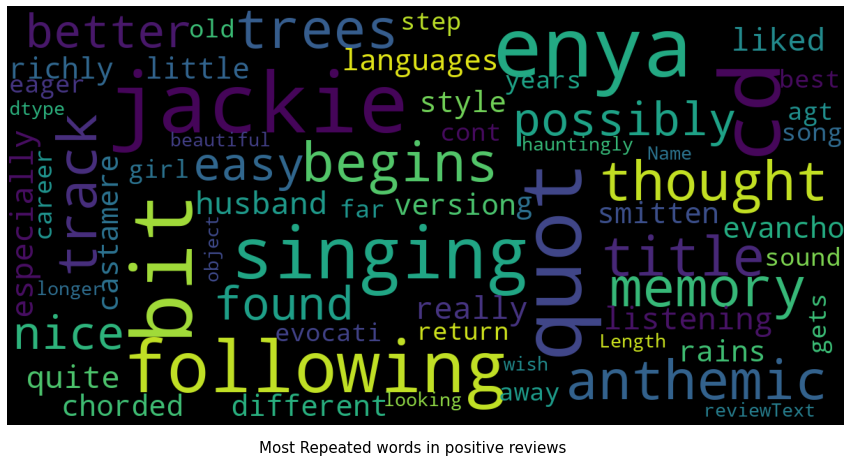

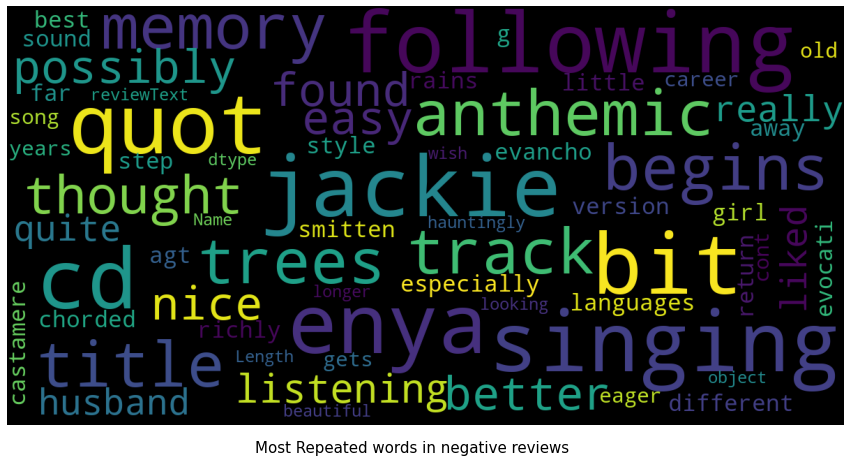

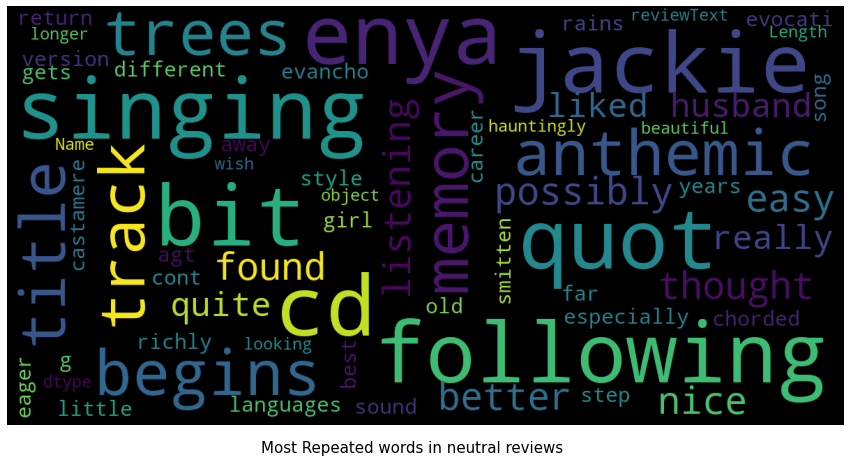

In [ ]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### <div class="alert alert-info">Interpretation
**- From the above plots we can see that most used positive, negative and neutral words from the review text**</div>

### BI-GRAM
A bigram or digram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words.

In [ ]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)   # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)                                         # Transforming the corpus into numbers
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]     # it provides a dictionary with the mapping of the word item index 
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

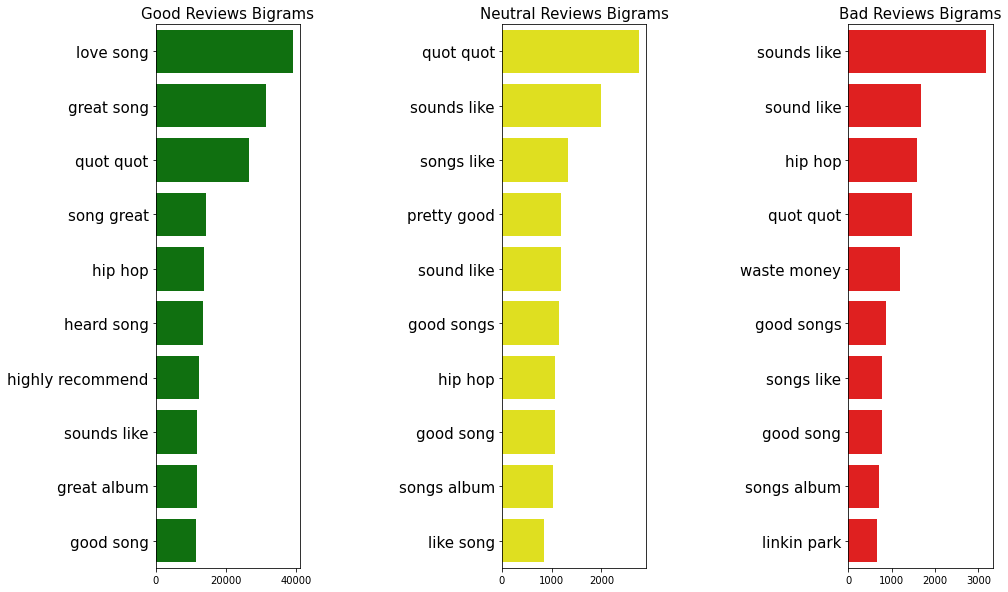

In [ ]:
# create a function for bigram plots
def n_gram_plot(data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()

### TF-IDF (Term Frequency-Inverse Document Frequency)

It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.
This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [ ]:
X = df['reviewText']
Y = df['Pros_cons']

In [ ]:
Y.value_counts()

Pos        702503
Neg         45503
Neutral     37723
Name: Pros_cons, dtype: int64

In [ ]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Getting unique values and converting it into array
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  45503]
 [     1  37723]
 [     2 702503]]


In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  31905]
 [     1  26284]
 [     2 491821]]


In [ ]:
# Applying TFIDF Vectorizer
%%time
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

CPU times: user 26.5 s, sys: 121 ms, total: 26.7 s
Wall time: 26.7 s


## <center><div class="alert alert-info">MODEL SELECTION</div>
Let's consider all the classification algorithm and perform the model selection process

### <center><div class="alert alert-success">LOGISITC REGRESSION</div>

In [ ]:
# Making and Fitting the Model
%%time
model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

CPU times: user 1min 27s, sys: 1min 3s, total: 2min 31s
Wall time: 1min 20s


In [ ]:
# Making unique Values and converting the values in array 
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0   8862]
 [     1   2304]
 [     2 224553]]


In [ ]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.71      0.46      0.56     13598
         neu       0.52      0.10      0.17     11439
         pos       0.93      0.99      0.96    210682

    accuracy                           0.92    235719
   macro avg       0.72      0.52      0.56    235719
weighted avg       0.90      0.92      0.90    235719

CPU times: user 257 ms, sys: 758 µs, total: 258 ms
Wall time: 259 ms


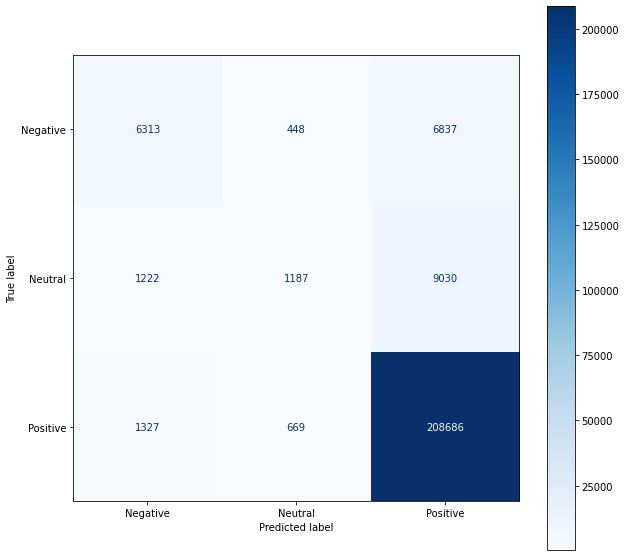

In [ ]:
color = 'white'
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

### &#10148; Sample Illustration</br>

In [ ]:
a = ['Nice song to here', 'worst song and waste of money', 'Good song but quality is not good']
a1 = vectorizer.transform(a)

In [ ]:
fo = model.predict(a1)
fo

array([2, 0, 2])

In [ ]:
s = pd.DataFrame({"Random_review":a, "Predictions": ['Positive', 'Negative', 'Positive']})
s

,Random_review,Predictions
0,Nice song to here,Positive
1,worst song and waste of money,Negative
2,Good song but quality is not good,Positive


### <center><div class="alert alert-success">NAIVE BAYES CLASSIFIER</div>

In [ ]:
# Making and Fitting the model
%%time
model1 = MultinomialNB().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

CPU times: user 307 ms, sys: 10.8 ms, total: 318 ms
Wall time: 321 ms


In [ ]:
print(classification_report(Y_test, y_pred1, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.89      0.00      0.01     13598
         nue       0.07      0.00      0.00     11439
         pos       0.89      1.00      0.94    210682

    accuracy                           0.89    235719
   macro avg       0.62      0.33      0.32    235719
weighted avg       0.85      0.89      0.84    235719



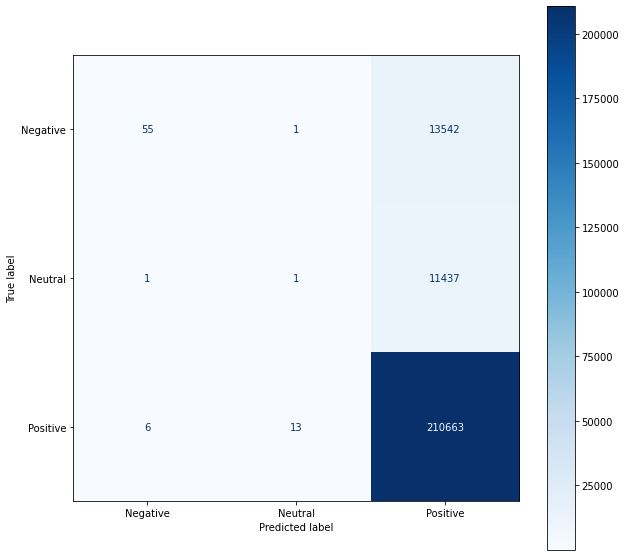

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model1, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

## <center><div class="alert alert-info">TIME SERIES ANALYSIS</div>
- Time series analysis is a technique in statistics that deals with time series data and trend analysis. Time series data follows periodic time intervals that have been measured in regular time intervals or have been collected in particular time intervals.

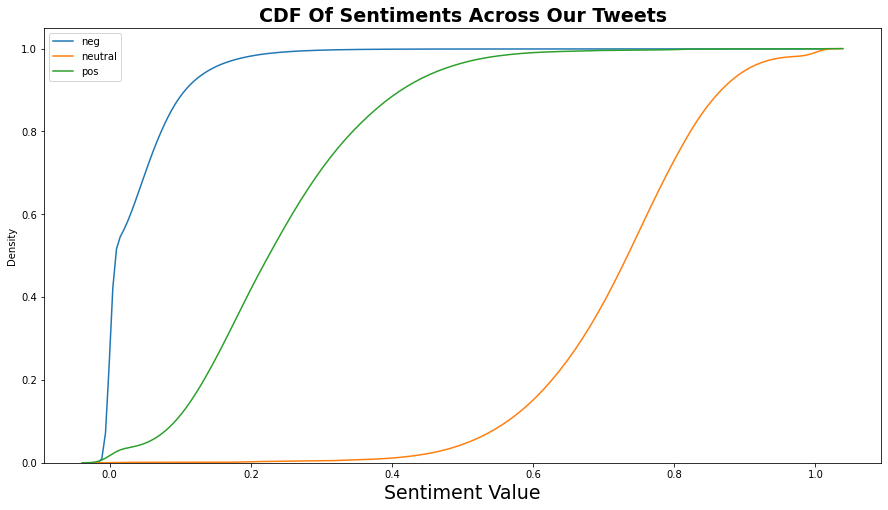

CPU times: user 31.7 s, sys: 1.52 s, total: 33.2 s
Wall time: 32.9 s


In [ ]:
%%time
plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments Across Our Reviews',fontsize=19,fontweight='bold')
sns.kdeplot(df['neg'],bw=0.1,cumulative=True)
sns.kdeplot(df['neu'],bw=0.1,cumulative=True)
sns.kdeplot(df['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

### <div class="alert alert-info">Interpretation
- **It is also clear that the dominant sentiment is neutral; oddly, most of the reviews do not resemble more positive or negative sentiment rather than neutral.**</div>

In [ ]:
df1 = df[['neg', 'pos', 'reviewTime']]

In [ ]:
# Setting the index as Date
df1 = df1.set_index('reviewTime')
df1.head()

,neg,pos
reviewTime,,
2001-01-03,0.050,0.197
2000-03-19,0.044,0.307
2014-02-28,0.000,0.410
2000-08-13,0.000,0.135
2001-12-07,0.022,0.215


In [ ]:
# Resampling the data based on Weekly 
df1 = df1.resample('W').sum()
df1.shape

(862, 2)

CPU times: user 144 ms, sys: 1.39 ms, total: 145 ms
Wall time: 148 ms


Text(0.5, 1.0, 'Pos_residual')

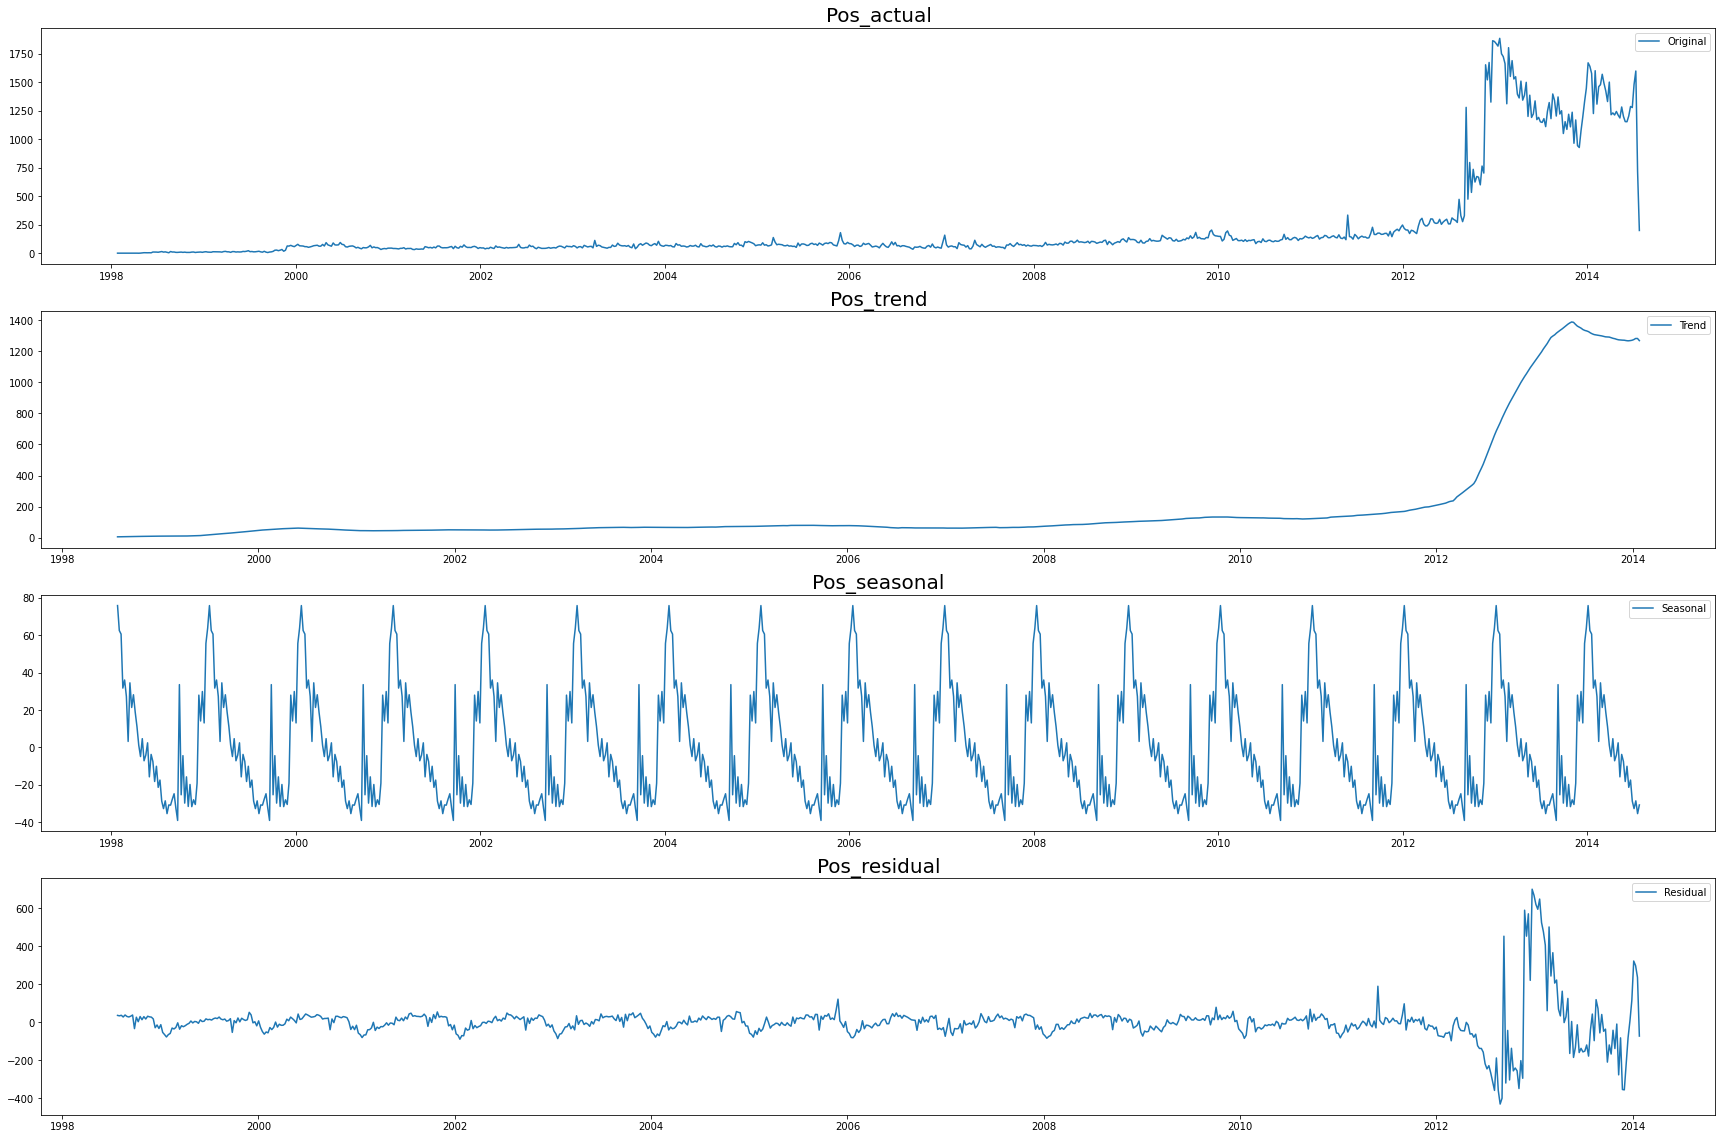

In [ ]:
# Seasonal Decompose For Positive Reviews
%%time
decomposition=seasonal_decompose(df1['pos'], period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['pos'],label='Original')
plt.legend(loc='best')
plt.title('Pos_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Pos_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Pos_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Pos_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for positive reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

CPU times: user 141 ms, sys: 1 ms, total: 142 ms
Wall time: 143 ms


Text(0.5, 1.0, 'neg_residual')

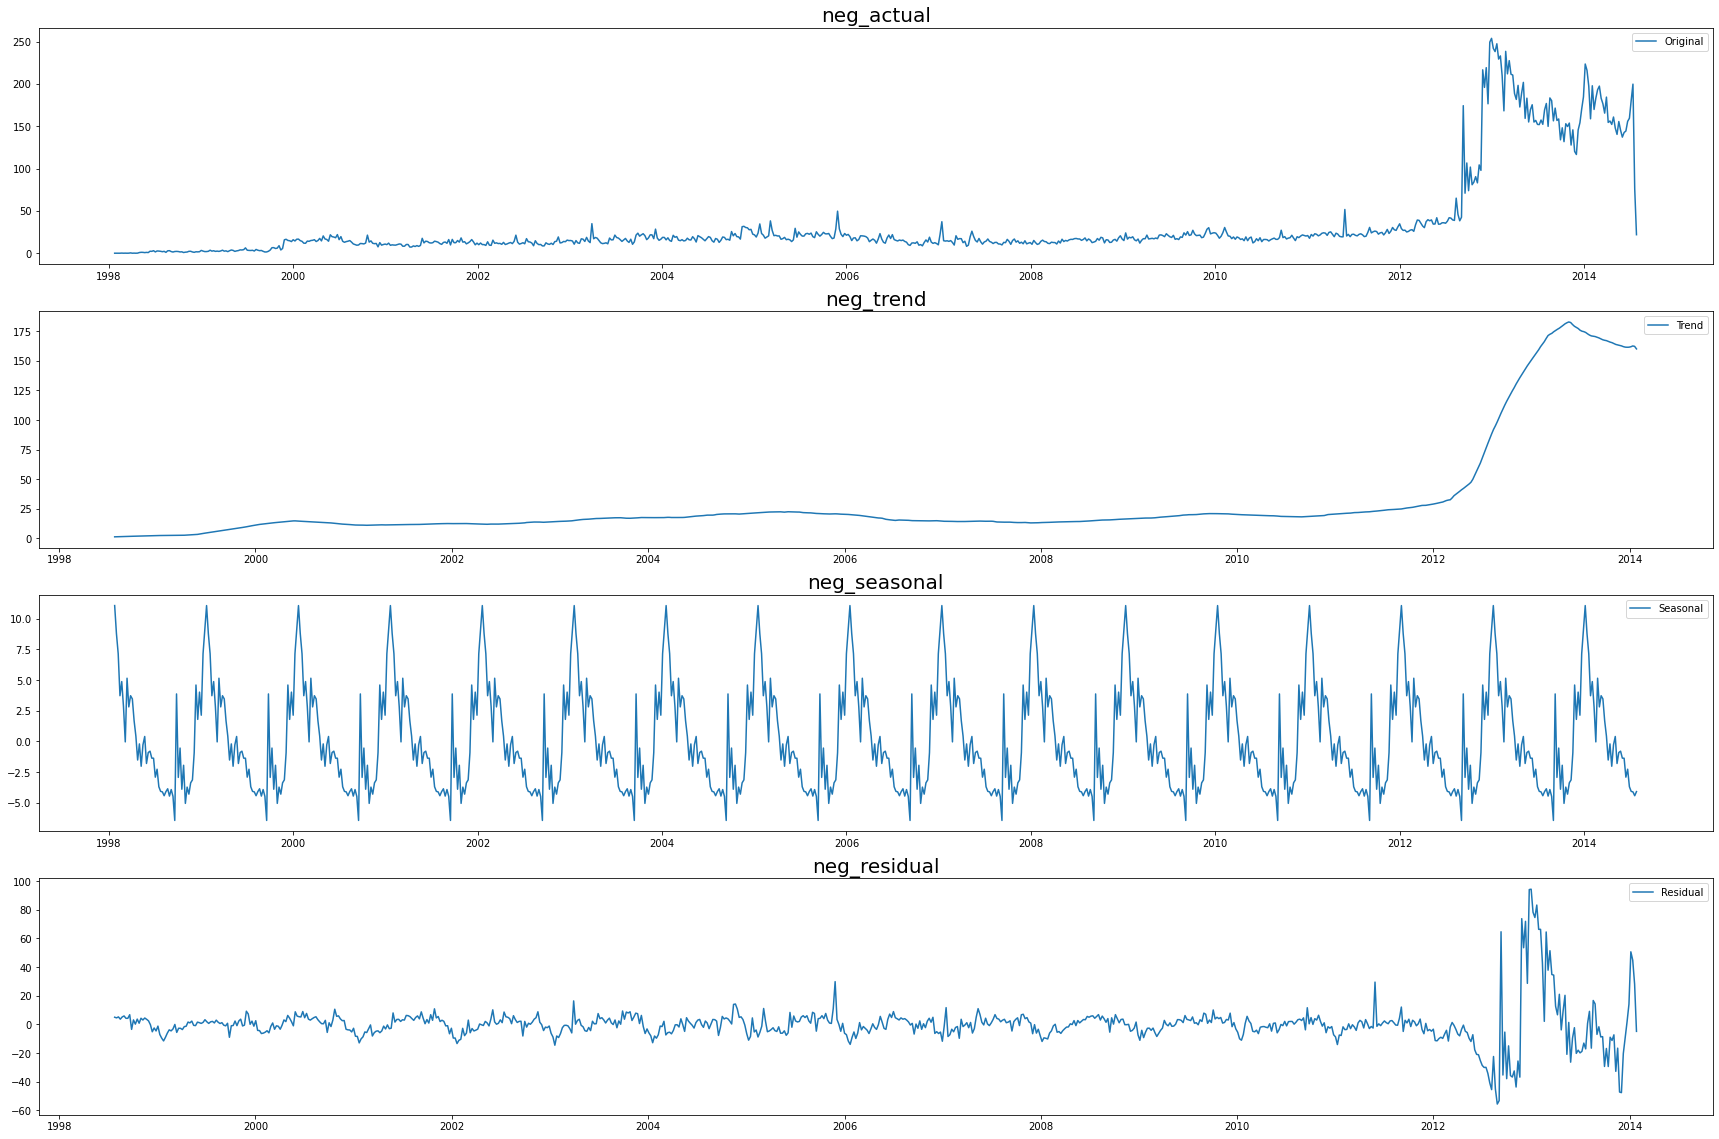

In [ ]:
# Seasonal Decompose For Negative Reviews
%%time
decomposition=seasonal_decompose(df1['neg'], period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neg'],label='Original')
plt.legend(loc='best')
plt.title('neg_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neg_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neg_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neg_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for negative reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

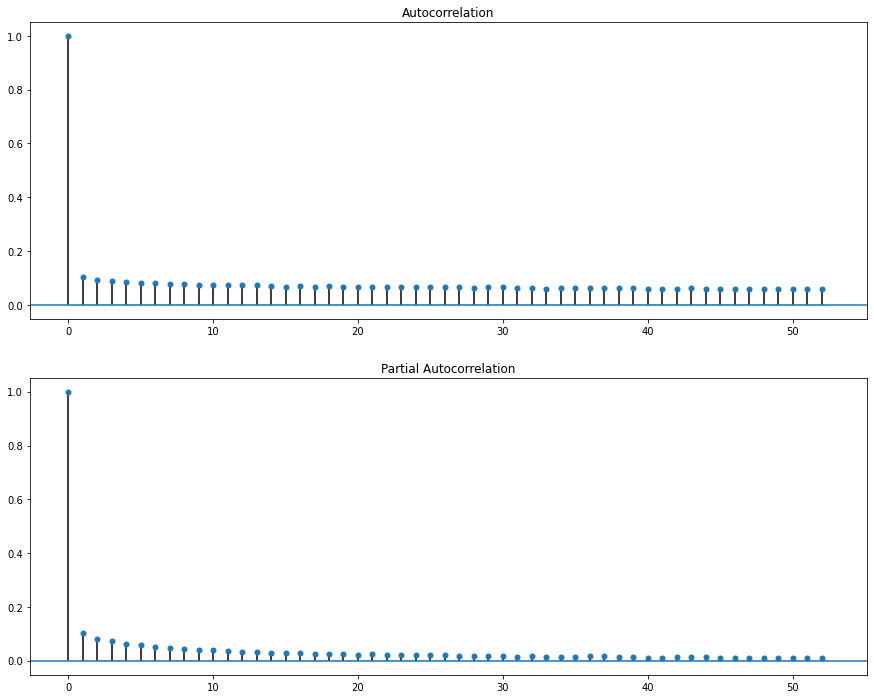

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['pos'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['pos'], ax=plt.gca(), lags = 52)
plt.show()

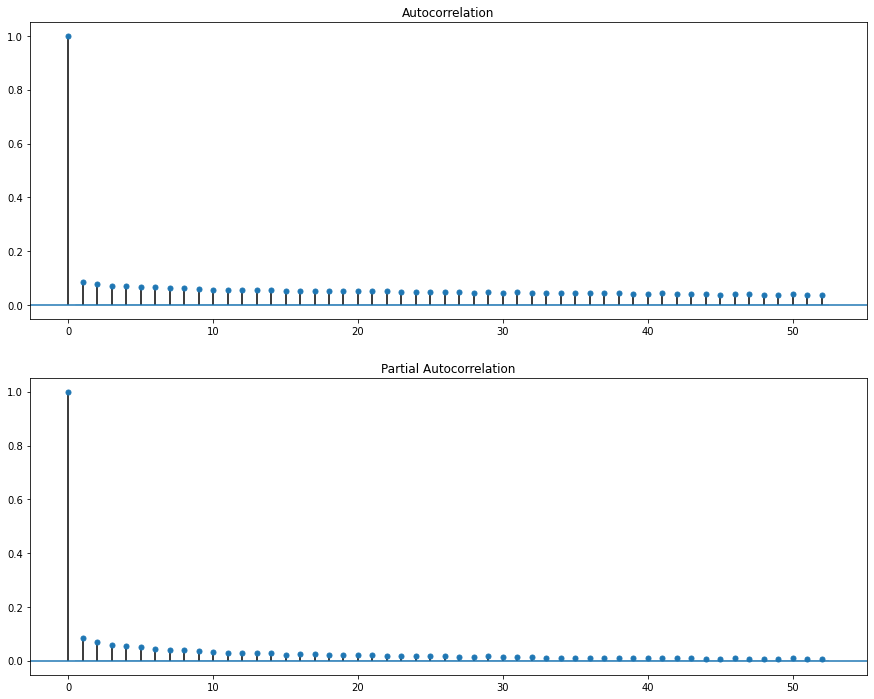

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['neg'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['neg'], ax=plt.gca(), lags = 52)
plt.show()

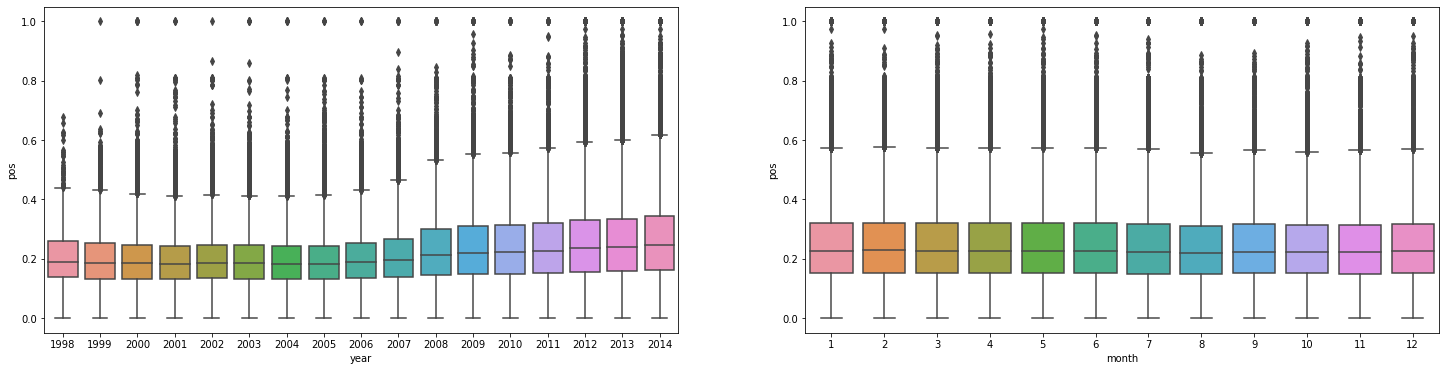

In [ ]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df.year, df.pos)

plt.subplot(1, 2, 2)
sns.boxplot(df.month, df.pos)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the visualisation we can see how the sentiments distributed over the years as well as months, the mean and the variation is almost same over the period**</div>

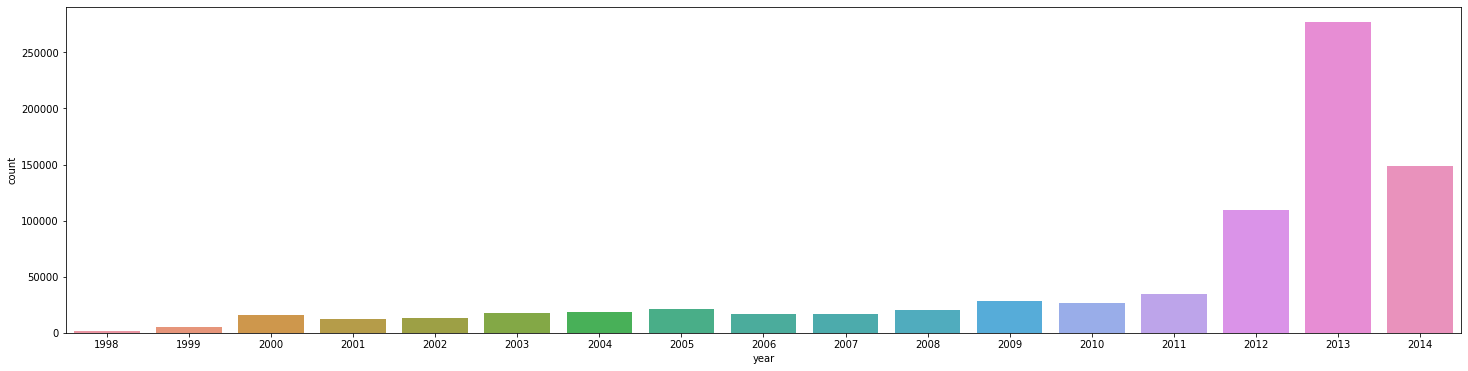

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(df.year)

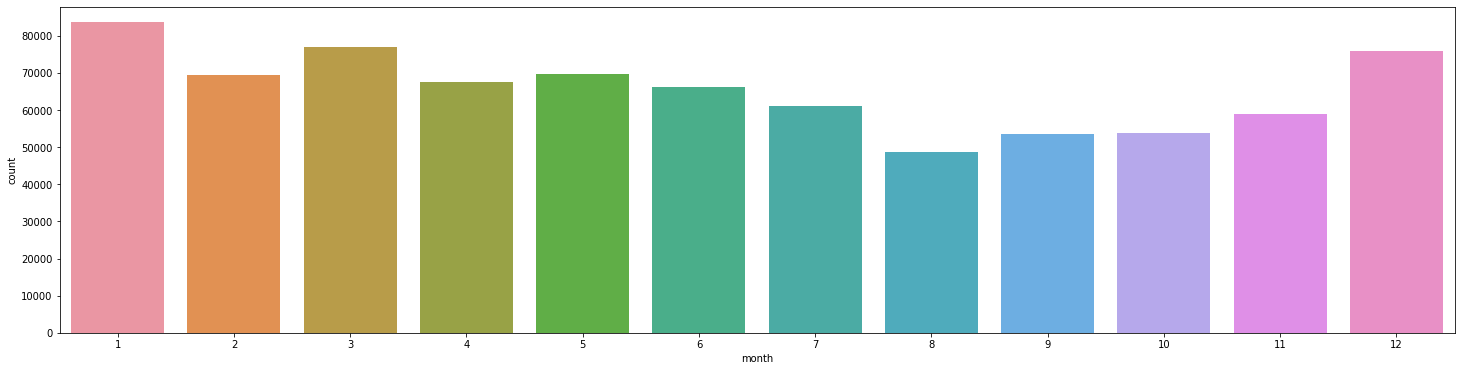

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(df.month)

In [ ]:
# Creating function to check stationarity
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [ ]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(df1['neg'])

'Pvalue:0.13614800826608742.Data is not stationary, make data stationary'

### <div class="alert alert-info">Interpretation
**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model**</div>

In [ ]:
# Checking Stationarity of Positive Sentiment Column
checkstationary(df1['pos'])

'Pvalue:0.12613460446570135.Data is not stationary, make data stationary'

### <div class="alert alert-info">Interpretation
**- From augmented dickey fuller test we can see that the data is not stationary so we should do diffrencing or d = 1 while building the model**</div>

In [ ]:
# Splitting the data
split = int(0.95 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 818, Test = 44


In [ ]:
# Creating function to get optimum p and q value
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [ ]:
p=[0,1, 2]
d=1
q=[0,1, 2]
p1=[]
q1=[]
rmse1=[]
P=[0,1, 2]
Q=[0,1, 2]
D=1
P1=[]
Q1=[]
for i in range(len(p)):
    for j in range(len(q)):
        for k in range(len(P)):
            for l in range(len(Q)):
                p1.append(p[i])
                q1.append(q[j])
                P1.append(P[k])
                Q1.append(Q[l])
                rmse1.append(sarima_model(p[i],d,q[j],P[k],D,Q[l])[0])

In [ ]:
val2 = pd.DataFrame(zip(p1,q1,P1,Q1,rmse1),columns=['p','q','P','Q','RMSE'])
val2.sort_values(by='RMSE').head(1)

In [ ]:
# Creating function for sarima model for negative sentiment
def SARMA1(df):
    model2 = SARIMAX(train['neg'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [ ]:
# Creating function for sarima model for positive sentiment
def SARMA2(df):
    model2 = SARIMAX(train['pos'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [ ]:
train1 = SARMA1(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [ ]:
train2 = SARMA2(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


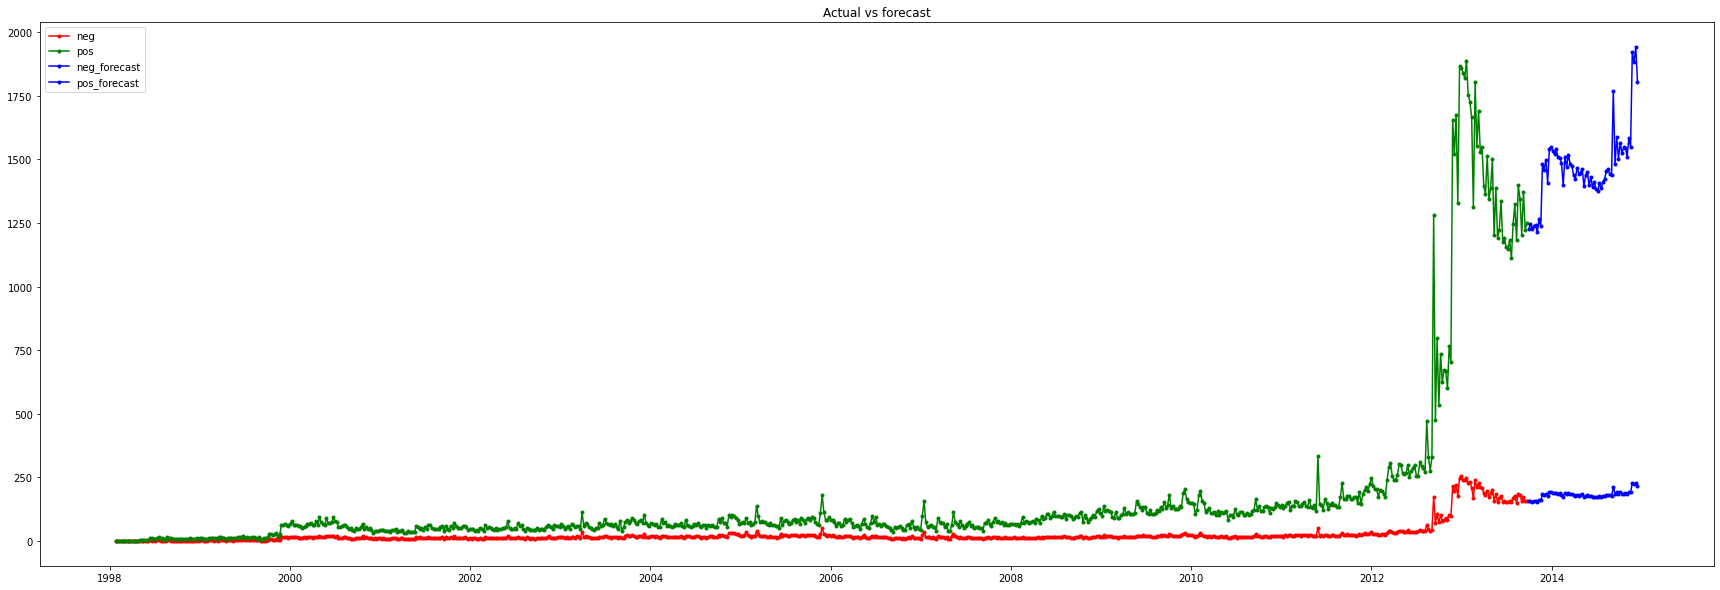

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast')
plt.plot(train['neg'],marker = '.', label = 'neg', color = 'red')
plt.plot(train['pos'],marker = '.', label = 'pos', color = 'g')
plt.plot(train1,marker = '.', label = 'neg_forecast', color = 'b')
plt.plot(train2,marker = '.', label = 'pos_forecast', color = 'b')
plt.legend()

In [ ]:
# Evaluation using RMSE
pos_rmse = np.sqrt(mean_squared_error(test['pos'], train2[:-20]))
neg_rmse = np.sqrt(mean_squared_error(test['pos'], train1[:-20]))

In [ ]:
res = pd.DataFrame({'Sentiments':['Pos', 'neg'], 'RMSE':[pos_rmse, neg_rmse]})
res

,Sentiments,RMSE
0,Pos,292.196452
1,neg,1105.022753


### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of forcast data we can see the SARIMA model is giving good forcast results and the positive and negative reviews are increasing over period but the positive reviews are inresing in more percent compare to negative review**</div>

## <center><div class="alert alert-info">CLUSTERING</div>
- Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.

In [56]:
df.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,brand,Pros_cons,neg,neu,pos,compound,year,month
0,pos,5555991584,the anthemic title track begins quot the memor...,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...",5.0,9.784800e+08,2001-01-03,A2EFCYXHNK06IS,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.050,0.753,0.197,0.9982,2001,1
1,pos,5555991584,just when i thought enya couldn t possibly get...,AKB,5.0,9.534240e+08,2000-03-19,A1WR23ER5HMAA9,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.044,0.649,0.307,0.9806,2000,3
2,pos,5555991584,nice cd for easy listening my husband and i bo...,Alexander,4.0,1.393546e+09,2014-02-28,A2IR4Q0GPAFJKW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.590,0.410,0.8779,2014,2
3,pos,5555991584,i really liked this cd especially the differen...,Alison Hight,4.0,9.661248e+08,2000-08-13,A2V0KUVAB9HSYO,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.000,0.865,0.135,0.7501,2000,8
4,pos,5555991584,enya s richly chorded style has smitten me onc...,"Al the Pal ""Al the Pal""",5.0,1.007683e+09,2001-12-07,A1J0GL9HCA7ELW,"[['CDs & Vinyl', 'New Age', 'Celtic New Age'],...",9.49,Unknown,Pos,0.022,0.763,0.215,0.9773,2001,12


In [57]:
X1 = df[['price', 'unixReviewTime']]

In [ ]:
# Scaling the data
%%time
Scaler = StandardScaler()
for i in X1.columns:
    X1[i] = Scaler.fit_transform(np.array(X1[i]).reshape(-1, 1))

CPU times: user 29.4 ms, sys: 0 ns, total: 29.4 ms
Wall time: 30.8 ms


CPU times: user 1min 31s, sys: 17.3 s, total: 1min 48s
Wall time: 1min 4s


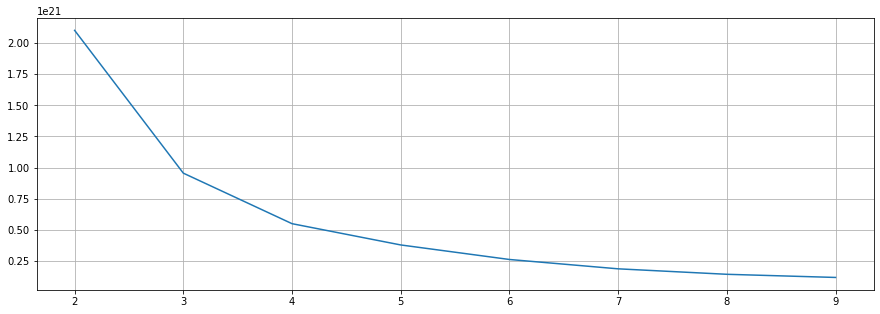

In [58]:
%%time
X1 = X1.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X1)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

In [59]:
# Making the model and fitting it
%%time
model1 = KMeans(n_clusters = 5, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

CPU times: user 20.4 s, sys: 3.75 s, total: 24.2 s
Wall time: 14.3 s


In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'brand', 'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

Text(0, 0.5, 'Unixreviewtime')

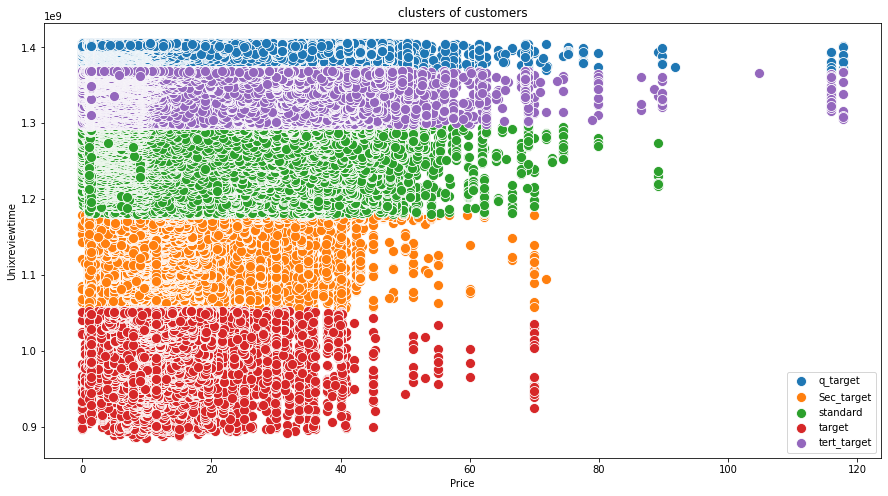

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=100,label="q_target")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=100,label="Sec_target")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=100,label="standard")
sns.scatterplot(x=X1[pred==3,0] ,y=X1[pred==3,1],s=100,label="target")
sns.scatterplot(x=X1[pred==4,0] ,y=X1[pred==4,1],s=100,label="tert_target")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Price")
plt.ylabel("Unixreviewtime")


### <div class="alert alert-info">Interpretation
- **1. This graph illustrates the relation between the review time and the price of the product where each cluster shows the grouping of reviews on the particular products**

- **2. The purple cluster shows the target cluster which can be said as excellent and the worst reviews that is 5 and 1 rated reviews. As the price of product is increasing the review time is also increasing, from this we can interpret that either the product is very good or worst as people tends to give instant reviews when the product is strongly liked or disliked by them**

- **3. The more the review time is increasing we can see the product price is also increasing from which we can interpret that customer take some time to give reviews when the product have higher price**</div>

In [62]:
clus = df.copy()

In [63]:
# Assigning the clusters 
clusters=[]
for c in pred:
    if c==0:
        clusters.append("q_target")
    elif c==1:
        clusters.append("Sec_target")
    elif c==2:
        clusters.append("standard")
    elif c==3:
        clusters.append("tert_target")
    elif c==4:
        clusters.append("target") 
        
        
clus["clusters1"]=clusters


In [64]:
d1=clus[(clus["clusters1"]=='target')]
d1["overall"].value_counts()

5.0    208188
4.0     35065
3.0     10857
1.0      7937
2.0      4586
Name: overall, dtype: int64

In [65]:
d2=clus[(clus["clusters1"]=='Sec_target')]
d2["overall"].value_counts()

5.0    46304
4.0    14822
3.0     5889
1.0     5086
2.0     3466
Name: overall, dtype: int64

In [66]:
d3=clus[(clus["clusters1"]=='standard')]
d3["overall"].value_counts()

5.0    59670
4.0    15450
3.0     6017
1.0     4753
2.0     3333
Name: overall, dtype: int64

In [67]:
d4=clus[(clus["clusters1"]=='tert_target')]
d4["overall"].value_counts()

5.0    36087
4.0    10702
3.0     3909
2.0     2125
1.0     2067
Name: overall, dtype: int64

In [68]:
d5=clus[(clus["clusters1"]=='q_target')]
d5["overall"].value_counts()

5.0    239343
4.0     36872
3.0     11051
1.0      7832
2.0      4318
Name: overall, dtype: int64

In [ ]:
improve=clus[(clus["clusters1"]=='target') & (clus["overall"]<3)]

In [ ]:
a=clus[(clus["clusters1"]=='target')]

In [ ]:
# Recommending the products
improve['asin'].value_counts()[0:10]

B004K4AUZW    302
B002HP8EKE    151
B004D1GZ2E     76
B004NSULHM     70
B004R0MF0W     63
B008RYN44U     61
B008UXALQ2     45
B008G12ERC     35
B005M2UBE6     34
B0074MZSPO     32
Name: asin, dtype: int64

In [ ]:
improve1=clus[(clus["clusters1"]=='target') & (clus["overall"]==1)]
improve1['asin'].value_counts()[0:10]

B004K4AUZW    220
B002HP8EKE    128
B004R0MF0W     47
B008UXALQ2     44
B004D1GZ2E     43
B004NSULHM     42
B00B5JY86W     31
B004S5JBZ8     26
B008RYN44U     25
B00970FKQ8     23
Name: asin, dtype: int64

In [ ]:
improve2=clus[(clus["clusters1"]=='target') & (clus["overall"]==5)]
improve2['asin'].value_counts()[0:10]

B004D1GZ2E    1187
B004K4AUZW     827
B0075MFS9Y     495
B00970FKQ8     432
B008K9SG9K     407
B006M4RN3U     382
B007DIQAXI     380
B0090OPBTC     354
B009KUAOH0     332
B005QJZ5FA     303
Name: asin, dtype: int64

## <center><div class="alert alert-info">CUSTOMER SEGMENTATION</div>

- We can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.
- Customers who use your platform have different needs and they have their own different profile. Your should adapt your actions depending on that.
- You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on the similarities between the customers
- But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM.
- **1. Recency: How recently customers made their purchase.**
- **2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.**
- **3. Monetary: How much money they spent in total.**

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'brand', 'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
CS_df = pd.DataFrame(df['userID'].unique())
CS_df.columns = ['userID']

In [ ]:
Max_purchase = df.groupby('userID').reviewTime.max().reset_index()
Max_purchase.columns = ['userID','MaxPurchaseDate']

### &#10148; Recency</br>

In [ ]:
Max_purchase['Recency'] = (Max_purchase['MaxPurchaseDate'].max() - Max_purchase['MaxPurchaseDate']).dt.days

In [ ]:
CS_df = pd.merge(CS_df, Max_purchase[['userID','Recency']], on='userID')
CS_df.head()

,userID,Recency
0,A2EFCYXHNK06IS,4949
1,A1WR23ER5HMAA9,5239
2,A2IR4Q0GPAFJKW,145
3,A2V0KUVAB9HSYO,5092
4,A1J0GL9HCA7ELW,4611


### &#10148; Frequency</br>

In [ ]:
tx_frequency = df.groupby('userID').reviewTime.count().reset_index()
tx_frequency.columns = ['userID','Frequency']

In [ ]:
CS_df = pd.merge(CS_df, tx_frequency, on='userID')

### &#10148; Revenue</br>

In [ ]:
tx_revenue = df.groupby('userID').price.sum().reset_index()

In [ ]:
CS_df = pd.merge(CS_df, tx_revenue, on='userID')

In [ ]:
CS_df.head()

,userID,Recency,Frequency,price
0,A2EFCYXHNK06IS,4949,2,18.98
1,A1WR23ER5HMAA9,5239,1,9.49
2,A2IR4Q0GPAFJKW,145,1,9.49
3,A2V0KUVAB9HSYO,5092,1,9.49
4,A1J0GL9HCA7ELW,4611,1,9.49


In [ ]:
CS_df.isnull().sum()

userID       0
Recency      0
Frequency    0
price        0
dtype: int64

### &#10148; K_means</br>

In [ ]:
a = CS_df.select_dtypes(exclude = 'object')
b = CS_df.select_dtypes(include = 'object')

In [ ]:
a.columns

Index(['Recency', 'Frequency', 'price'], dtype='object')

In [ ]:
CS_df

,userID,Recency,Frequency,price
0,A2EFCYXHNK06IS,4949,2,18.98
1,A1WR23ER5HMAA9,5239,1,9.49
2,A2IR4Q0GPAFJKW,145,1,9.49
3,A2V0KUVAB9HSYO,5092,1,9.49
4,A1J0GL9HCA7ELW,4611,1,9.49
...,...,...,...,...
452795,AN876GC9HI5H7,40,1,1.29
452796,A3UYAB3R7B2UVQ,23,1,1.29
452797,A3R6MXQ4H1F6ZZ,43,1,1.29
452798,A1VKQ7Q3VV2N37,39,1,1.29


In [ ]:
CS_df1 = CS_df.copy()

In [ ]:
CS_df1.head()

,userID,Recency,Frequency,price
0,A2EFCYXHNK06IS,4949,2,18.98
1,A1WR23ER5HMAA9,5239,1,9.49
2,A2IR4Q0GPAFJKW,145,1,9.49
3,A2V0KUVAB9HSYO,5092,1,9.49
4,A1J0GL9HCA7ELW,4611,1,9.49


In [ ]:
# Scaling the data
%time
Scaler = StandardScaler()
for i in a.columns:
    CS_df1[i] = Scaler.fit_transform(np.array(CS_df[i]).reshape(-1, 1))

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 9.78 µs


In [ ]:
# Getting optimum cluster number
%%time
X = CS_df1.drop(['userID'], axis = 1).values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    distortion.append(kmeans.inertia_)

CPU times: user 1min 24s, sys: 14.7 s, total: 1min 39s
Wall time: 55.4 s


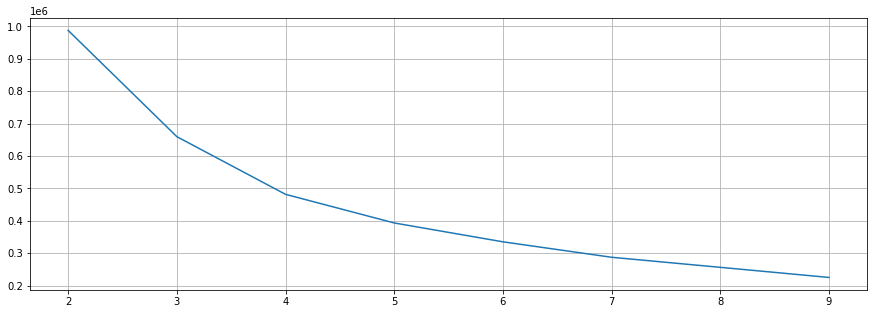

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

### <div class="alert alert-info">Interpretation
**- From the above elbow curve we can take k as 3 because the slope is more at k = 3**</div>

In [ ]:
# Creating Model and fitting it
%%time
model = KMeans(n_clusters = 3, random_state = 10).fit(X)
pred = model.fit_predict(X)

CPU times: user 12.2 s, sys: 2.37 s, total: 14.6 s
Wall time: 9.4 s


In [ ]:
CS_df.columns

Index(['userID', 'Recency', 'Frequency', 'price'], dtype='object')

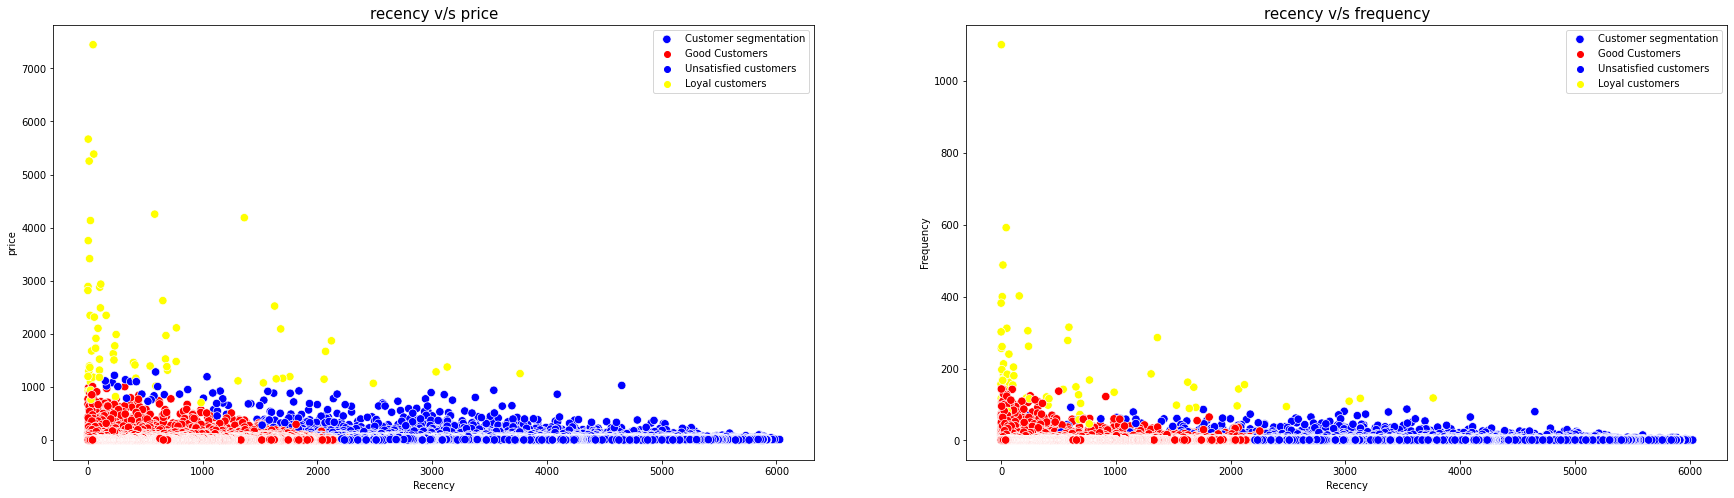

In [ ]:
color1 = [ "red", "blue", "Yellow"]
l = ["Customer segmentation", 'Good Customers', 'Unsatisfied customers', 'Loyal customers']
plt.figure(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['price'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s price', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['Frequency'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s frequency', fontsize = 15)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above clustering result we can see cleary 3 types of clusters are there**
- 1. Good customers: They are visiting the sites more frequently and revenue is good
- 2. Unsatisfied customers: They are stop visiting the site for a long time so we can assume that they are not satisfied with the service
- 3. Loyal customers: they are frequently visiting customers aswell as they are generating high revenue than that good customers </div>

## <center><div class="alert alert-info">AMAZON RECOMMENDATION SYSTEM</div>

### What Recommendation Systems Can Solve?
- It helps the consumer to find the best product.
- It helps websites to increase user engagement.
- It makes the contents more personalized.
- It helps websites to find the most relevant product for the consumer.
- Help item providers in delivering their items to the right user.

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'brand', 'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
df3 = df[['userID', 'asin', 'overall']]

In [ ]:
df3.rename(columns = {'asin':'productId', 'overall': 'ratings'}, inplace = True)

In [ ]:
df3.head()

,userID,productId,ratings
0,A2EFCYXHNK06IS,5555991584,5.0
1,A1WR23ER5HMAA9,5555991584,5.0
2,A2IR4Q0GPAFJKW,5555991584,4.0
3,A2V0KUVAB9HSYO,5555991584,4.0
4,A1J0GL9HCA7ELW,5555991584,5.0


In [ ]:
df3.describe()

,ratings
count,785729.000000
mean,4.551320
std,0.949837
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df4=df3.iloc[:1000005,0:]

In [ ]:
df4.isnull().sum()

userID       0
productId    0
ratings      0
dtype: int64

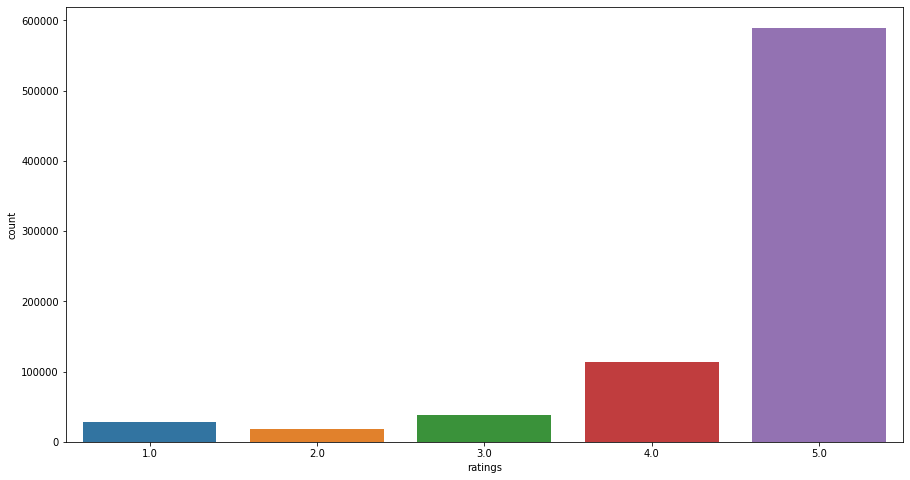

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(df4['ratings'])
plt.show()

In [ ]:
print("\nTotal no of ratings :",df4.shape[0])
print("Total No of Users   :", len(np.unique(df4.userID)))
print("Total No of products  :", len(np.unique(df4.productId)))


Total no of ratings : 785729
Total No of Users   : 452800
Total No of products  : 264095


In [ ]:
top_rating = df4.groupby(by='userID')['ratings'].count().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',top_rating)

Top 10 users based on ratings: 
 userID
A3W4D8XOGLWUN5    1101
A9Q28YTLYREO7      592
ABDR6IJ93HFIO      488
A1W16J9R4DOBEC     402
A3HU0B9XUEVHIM     400
A1GN8UJIZLCA59     382
A3EBHHCZO6V2A4     315
A3KJ6JAZPH382D     312
AMP7TQRWAIE84      305
A3UCCGOG903V0W     302
Name: ratings, dtype: int64


In [ ]:
new_df=df4.groupby("productId").filter(lambda x:x['ratings'].count() >=50)
new_df

,userID,productId,ratings
0,A2EFCYXHNK06IS,5555991584,5.0
1,A1WR23ER5HMAA9,5555991584,5.0
2,A2IR4Q0GPAFJKW,5555991584,4.0
3,A2V0KUVAB9HSYO,5555991584,4.0
4,A1J0GL9HCA7ELW,5555991584,5.0
...,...,...,...
830435,A1GOBKKB3R2H59,B00KILDVEI,5.0
830436,A3VIILKLJ18TQN,B00KILDVEI,5.0
830437,A2W1DUQHIKU0JX,B00KILDVEI,5.0
830438,A35D67GR5F21GL,B00KILDVEI,5.0


In [ ]:
new_df1=new_df.head(10000)

ratings_matrix = new_df1.pivot_table(values='ratings', index='productId', columns='userID', fill_value=0)
ratings_matrix.head()

userID,A07065703F6WHQ9B8RW35,A08161909WK3HU7UYTMW,A086594320Z777EHOFWKU,A08731992KF8SQ23OJVAK,A099280716ZEH5UPWAN4A,A100REFRMQ99F3,A101Q42OCLMDDH,A102NHXWXFZIRX,A10323WWTFPSGP,A103KNDW8GN92L,...,AZTMY41RFNJR9,AZTWURBC4PZSC,AZTZAE2MO7T8,AZUQI0LIRM7DH,AZVA13Q19KURR,AZW45WWIAIFXK,AZWDGGR8YZ9ZS,AZWJ47UV246FS,AZX97OR5RX3CF,AZZDB4I5INFON
productId,,,,,,,,,,,,,,,,,,,,,
5555991584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000016T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000016W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000017R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B0000002ME,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (84, 8339)


In [ ]:
X = ratings_matrix

In [ ]:
new_df.head()

,userID,productId,ratings
0,A2EFCYXHNK06IS,5555991584,5.0
1,A1WR23ER5HMAA9,5555991584,5.0
2,A2IR4Q0GPAFJKW,5555991584,4.0
3,A2V0KUVAB9HSYO,5555991584,4.0
4,A1J0GL9HCA7ELW,5555991584,5.0


In [ ]:
X.shape

(84, 8339)

In [ ]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: user 171 ms, sys: 160 ms, total: 331 ms
Wall time: 191 ms


(84, 5)

In [ ]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: user 612 µs, sys: 0 ns, total: 612 µs
Wall time: 621 µs


(84, 84)

The Pearson product-moment correlation coefficient (or Pearson correlation coefficient) is a measure of the strength of a linear association between two variables

In [ ]:
def recommend(s):
  l = list(X.index)
  h = l.index(s)
  i=X.index[h]
  correlation_product_ID = correlation_matrix[h]
  Recommend = list(X.index[correlation_product_ID > 0.05])
  Recommend.remove(i)
  print(Recommend[0:5])

In [ ]:
s = 'B0000002ME'

In [ ]:
recommend(s)

['5555991584', 'B00000016T', 'B00000016W', 'B00000017R', 'B0000002O5']


### <div class="alert alert-info">Interpretation
**- From the above recomendation system we can see by using the correlation matrix the products are recomended based on the related product so this will help the customers to find the related products and it will generate the good revenue for the company aswell**

## Conclusion
We have done a pretty neat job on classifying all the classes starting from splitting the sentiments based on overall score,text cleaning, customize the stopwords list based on requirement and finally handling imbalance with smote. Here are few insights from the notebook.

Consider welcoming ngram in sentiment analysis as one word can't give is proper results and stop words got to be manually checked as they have negative words. It is advised to avoid using stop words in sentiment analysis
Most of our neutral reviews were actual critic of product from the buyers, so amazon can consider these as feedback and give them to the seller to help them improve their products.

Balancing the dataset got me a very fruitful accuracy score. Without balancing, I got good precision but very bad recall and inturn affected my f1 score. So balancing the target feature is important
In sentiment analysis, we should concentrate on our f1 score where we got an average of 90% so we did a pretty good job.